# Linear Disciminant Analysis


LinearDiscriminantAnalysis is a supervised method, meaning it uses the output class labels to find a feature combination that best separates different classes. It can be used for both classification and dimensionality reduction.

In [235]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [236]:
#Generate dataset using make_classification

X, y = make_classification(
    n_samples=2000,
    n_features=60,          # high dimensional
    n_informative=10,       # few informative
    n_redundant=20,         # correlated features
    n_repeated=0,
    n_classes=3,
    n_clusters_per_class=2,
    class_sep=1.2,          # moderate separation
    flip_y=0.03,            # small noise
    random_state=42
)


In [237]:
X.shape

(2000, 60)

In [238]:
y.shape


(2000,)

In [239]:
X

array([[ 0.02901704, -2.80666106,  8.186133  , ...,  2.00984864,
        -0.34028952,  1.53349323],
       [ 0.52747707,  0.53185806,  0.7953174 , ...,  0.29249803,
         0.8299925 ,  0.17994641],
       [ 1.60904779, -0.7240331 , -0.70289001, ...,  0.82018918,
         0.40360921,  1.52183995],
       ...,
       [ 0.31928573, -1.89109326,  3.04074039, ..., -1.82208163,
         1.15360181, -1.46654679],
       [-0.9834749 , -0.07664594, -3.23762205, ..., -5.62014961,
        -2.42703297,  2.97347926],
       [-0.24195735, -0.26122634, -4.7067243 , ..., -6.50097381,
        -0.3960024 ,  2.33359989]])

In [240]:
y

array([2, 0, 0, ..., 1, 2, 1])

In [241]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Build pipeline
pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=2)),
    ("classifier", LogisticRegression(max_iter=500))
])

# K Fold Cross Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(pipeline, X, y, cv=kfold, scoring="accuracy")

# Output results
print("Accuracy for each fold:", scores)
print("Mean Accuracy:", scores.mean())
print("Standard Deviation:", scores.std())


Accuracy for each fold: [0.51   0.455  0.4975 0.4325 0.4575]
Mean Accuracy: 0.47050000000000003
Standard Deviation: 0.02878367592924851


In [242]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)


In [243]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

In [244]:
# Logistic Regression WITHOUT LDA
log_reg = LogisticRegression(
    max_iter=5000,
)

log_reg.fit(X_train, y_train)
y_pred_no_lda = log_reg.predict(X_test)

accuracy_no_lda = accuracy_score(y_test, y_pred_no_lda)
print("Accuracy WITHOUT LDA:", accuracy_no_lda)


Accuracy WITHOUT LDA: 0.715


In [245]:
#LDA for Dimensionality Reduction
lda = LinearDiscriminantAnalysis(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)


In [246]:
# Logistic Regression WITH LDA
log_reg_lda = LogisticRegression(
    max_iter=5000
)

log_reg_lda.fit(X_train_lda, y_train)
y_pred_lda = log_reg_lda.predict(X_test_lda)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
print("Accuracy WITH LDA:", accuracy_lda)


Accuracy WITH LDA: 0.705


In [247]:
#Explained Variance Ratio

print("Explained Variance Ratio:", lda.explained_variance_ratio_)


Explained Variance Ratio: [0.71492802 0.28507198]


In [248]:

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

log_reg_pca = LogisticRegression(max_iter=5000)
log_reg_pca.fit(X_train_pca, y_train)

y_pred_pca = log_reg_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)

print("Accuracy WITH PCA:", acc_pca)
print("PCA Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total PCA Variance Captured:", sum(pca.explained_variance_ratio_))



Accuracy WITH PCA: 0.48
PCA Explained Variance Ratio: [0.1262469  0.08453754]
Total PCA Variance Captured: 0.21078443998596225


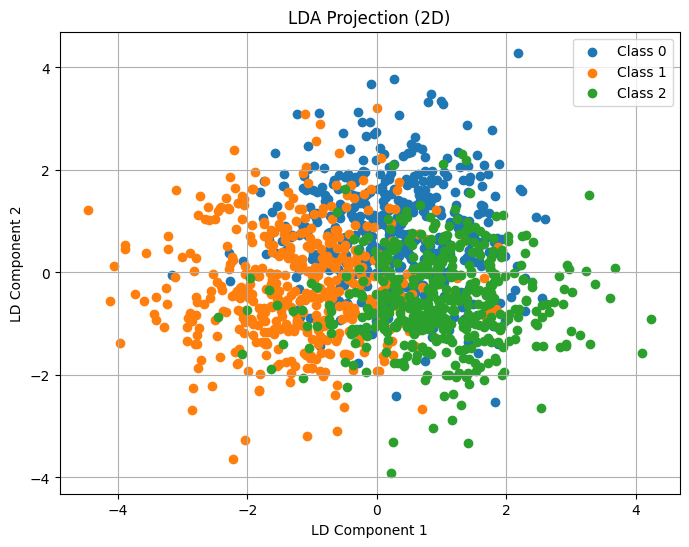

In [249]:
#Visualization of LDA Projection
plt.figure(figsize=(8,6))

for label in np.unique(y_train):
    plt.scatter(
        X_train_lda[y_train == label, 0],
        X_train_lda[y_train == label, 1],
        label=f"Class {label}"
    )

plt.xlabel("LD Component 1")
plt.ylabel("LD Component 2")
plt.title("LDA Projection (2D)")
plt.legend()
plt.grid(True)
plt.show()

In [250]:

print("\n--- Final Comparison ---")
print("Original Feature Dimension:", X.shape[1])
print("Reduced Feature Dimension:", X_train_lda.shape[1])

print("\nAccuracy WITH PCA:", acc_pca)
print("Accuracy without LDA:", accuracy_no_lda)
print("Accuracy with LDA:", accuracy_lda)


--- Final Comparison ---
Original Feature Dimension: 60
Reduced Feature Dimension: 2

Accuracy WITH PCA: 0.48
Accuracy without LDA: 0.715
Accuracy with LDA: 0.705


In [251]:
print("\nConfusion Matrix (with LDA):\n", confusion_matrix(y_test, y_pred_lda))
print("\nClassification Report (with LDA):\n", classification_report(y_test, y_pred_lda))


Confusion Matrix (with LDA):
 [[125  37  38]
 [ 25 155  21]
 [ 33  23 143]]

Classification Report (with LDA):
               precision    recall  f1-score   support

           0       0.68      0.62      0.65       200
           1       0.72      0.77      0.75       201
           2       0.71      0.72      0.71       199

    accuracy                           0.70       600
   macro avg       0.70      0.70      0.70       600
weighted avg       0.70      0.70      0.70       600

